In [ ]:
pip install qiskit-aer qiskit-ibm-runtime


In [ ]:
# QML
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# CML
import tensorflow as tf
from tensorflow import keras as K

# Timer
from timeit import default_timer as timer
from datetime import timedelta

# for data
import pandas as pd
from os import listdir
import os
from matplotlib import image
from matplotlib import pyplot as plt
import h5py
#import cv2
from sklearn.model_selection import train_test_split


# for evaluation
from sklearn.metrics import classification_report
import itertools

# calculus
import numpy as np

#Simulation

from qiskit_aer import AerSimulator
from qiskit import transpile

#Parallel Processing
import concurrent.futures
#cv2
import cv2

from qiskit.visualization import plot_histogram

#Math
import math


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [ ]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import qiskit_aer.noise as noise


In [ ]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(token='YOUR TOKEN',channel='ibm_quantum')
# service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
noise_model = NoiseModel.from_backend(backend)
# Error probabilities
prob_1 = 0.09 # 1-qubit gate
prob_2 = 0.09  # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
# noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'u1', 'u2']
  All-qubits errors: ['u1', 'u2', 'u3']


In [ ]:
data_train = []
type_of_disease =['Benign_Noise']
data_directory = r'C:\Users\LENOVO\Desktop\The IQ-OTHNCCD lung cancer dataset'
train_directory = os.path.join(data_directory)
for id, sp in enumerate(type_of_disease):
    for file in os.listdir(os.path.join(train_directory, sp)):
        data_train.append(['{}/{}/{}'.format(data_directory,sp, file), id, sp])

train = pd.DataFrame(data_train, columns=['Image', 'Id of Disease','Type of Disease'])

In [ ]:
phi = [1, 1, 1, 1]
n = 4
def CONVCircuit(phi):
    qc=QuantumCircuit(4,4)
    # parameter
    theta = np.pi / 2
    # for i in range (4):
    #   qc.rx(phi[i] * np.pi,i)
    qc.rx(phi[0] * np.pi, 0)
    qc.rx(phi[1] * np.pi, 1)
    qc.rx(phi[2] * np.pi, 2)
    qc.rx(phi[3] * np.pi, 3)
    with qc.for_loop(range(2)) as _:
        qc.crz(theta, 1, 0)
        qc.crz(theta, 3, 2)

    # qc.crz(theta, 1, 0)
    # qc.crz(theta, 3, 2)
    qc.crx(theta, 1, 0)
    qc.crx(theta, 3, 2)
    qc.crz(theta, 2, 0)
    qc.crx(theta, 2, 0)
    # with qc.for_loop(range(2)) as _:
    #     qc.crz(theta, 2, 0)
    #     qc.crx(theta, 2, 0)

    qc.measure([0],[0])
    backend = AerSimulator(noise_model=noise_model,
                           coupling_map=coupling_map,
                           basis_gates=basis_gates)
    transpiled_circuit = transpile(qc, backend)
    result = backend.run(transpiled_circuit).result()
    counts = result.get_counts(qc)
    expectation_value = (counts.get('0000', 0) - counts.get('0001', 0)) / 1024



    # return qc
    return expectation_value

In [ ]:
# Create an empty noise model
noise_model = NoiseModel()

# Add depolarizing error to all single qubit u1, u2, u3 gates
error = depolarizing_error(0.05, 1)
noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])

# Print noise model info
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'u1', 'u2']
  All-qubits errors: ['u1', 'u2', 'u3']


In [ ]:
def QCONV1(X, image_number, image_total, step=2):
    H, W = X.shape
    step2 = 2
    out = np.zeros(((H//step), (W//step)))
    for i in range(0, W, step):
        print("processing image "+str(image_number)+"/ "+str(image_total)+": "+str(i)+"px   ", end="\r")
        for j in range(0, H, step):
            # get 2x2 pixels and make them 1D array
            phi = X[i:i+2, j:j+2].flatten()
            if len(phi) == 0:
              continue  # Skip this iteration if phi is empty

            if len(phi) < 3:
            # print(f"Skipping processing for {file} due to insufficient phi size.")
              continue  # Skip this iteration if phi does not meet size requirements
            measurement = CONVCircuit(phi)
            out[i//step, j//step] = measurement

    return out

In [ ]:
processFolder = r'C:\Users\LENOVO\Desktop\The IQ-OTHNCCD lung cancer dataset\Noise_11'
# Parameters for processing
scale_percent = 25  # percent of original size for resizing
step = 2  # Step for the QCONV1 function

# Ensure the processed directory exists
if not os.path.exists(processFolder):
    os.makedirs(processFolder)
print('task _ completed')
start = timer()

for id, sp in enumerate(type_of_disease):
    print(f"Processing {sp}...")
    for file in os.listdir(os.path.join(train_directory, sp)):
        filepath = os.path.join(train_directory, sp, file)
        processed_filepath = os.path.join(processFolder, sp, file.split('.')[0] + '.npz')

        # Check if already processed
        if os.path.exists(processed_filepath):
            continue

        # Read image
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue  # Skip if the file is not an image

        # Resize image
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

        # Normalize
        NorImages = resized / 255.0

        # Apply Quantum Convolution
        processed = QCONV1(NorImages, file, len(os.listdir(os.path.join(train_directory, sp))), step)


        # Ensure the disease type subfolder exists in the processed folder
        processed_subfolder = os.path.join(processFolder, sp)
        if not os.path.exists(processed_subfolder):
            os.makedirs(processed_subfolder)

        # Save processed image and label
        np.savez_compressed(processed_filepath, image=processed, label=id)

end = timer()
time = (end - start)
print("Processing completed in:", str(timedelta(seconds=round(time))))

task _ completed
Processing Bengin_Noise...
Processing completed in: 0:03:151).jpg/ 1: 126px   


In [ ]:
for id, sp in enumerate(type_of_disease):
    for file in os.listdir(os.path.join(train_directory, sp)):
        filepath = os.path.join(train_directory, sp, file)
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

        # Check if the image is empty or could not be read
        if img is None or img.size == 0:
            print(f"Empty or unreadable image: {file} in {sp}")
            continue

        # Assuming resizing logic is here
        # resized = ...

        # Check after resizing and normalizing
        if resized.size == 0 or np.any(resized.shape == 0):
            print(f"Image becomes empty after resizing: {file} in {sp}")
            continue

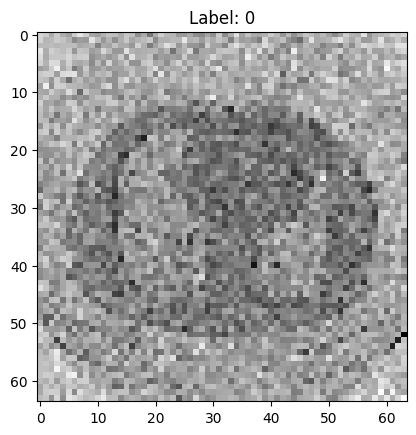

In [ ]:
data_directory =  r'C:\Users\LENOVO\Desktop\The IQ-OTHNCCD lung cancer dataset\Noise_11\Bengin_Noise'
filename = 'Benign case (101).npz'  # Example filename, adjust as necessary

file_path = os.path.join(data_directory, filename)

# Check if the file exists
if os.path.exists(file_path):
    data = np.load(file_path)
    image = data['image.npy']  # Adjusted key to match your description
    label = data['label.npy']  # Adjusted key to match your description

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()
else:
    print(f'File does not exist: {file_path}')